In [6]:
pip install grad-cam

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 77.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 113.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 93.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 55.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 82.0 MB/s 

In [23]:
from PIL import Image
import torch
from torchvision.models import resnet18, ResNet18_Weights
import numpy as np
import matplotlib.pyplot as plt
import requests, os
from io import BytesIO

In [24]:
from torchvision.models import resnet50, ResNet50_Weights
from pytorch_grad_cam import GradCAM,  ScoreCAM, AblationCAM
from pytorch_grad_cam.utils.image import show_cam_on_image
from pytorch_grad_cam.utils.model_targets import ClassifierOutputTarget

In [25]:
# Load model and weights
weights = ResNet50_Weights.IMAGENET1K_V1
model = resnet50(weights=weights)
model.eval()

# Setting Grad-CAM layer
target_layer = model.layer4[-1]

# ImageNet category labels
categories = weights.meta["categories"]

# Preprocess function
preprocess = weights.transforms()


Processing: West_Highland_white_terrier
 → GRADCAM


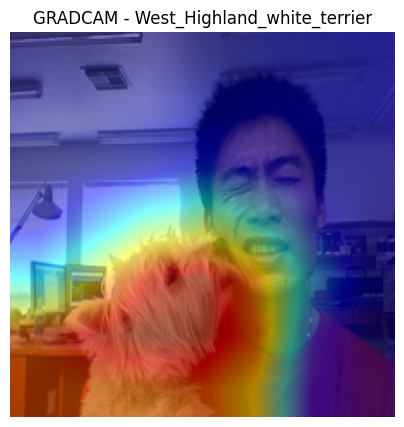

 → SCORECAM


100%|██████████| 128/128 [03:57<00:00,  1.85s/it]


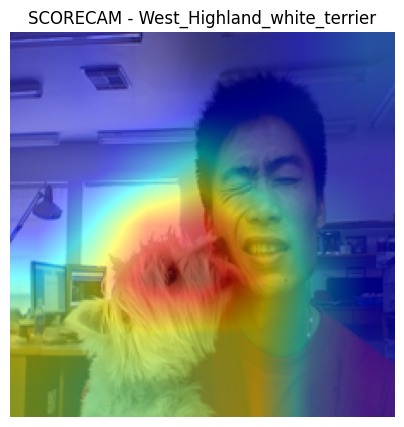

 → ABLATIONCAM


100%|██████████| 64/64 [04:37<00:00,  4.34s/it]


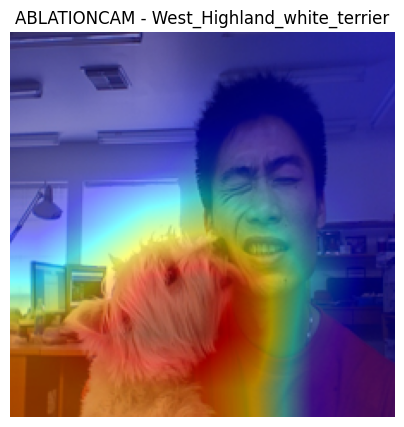

Processing: American_coot
 → GRADCAM


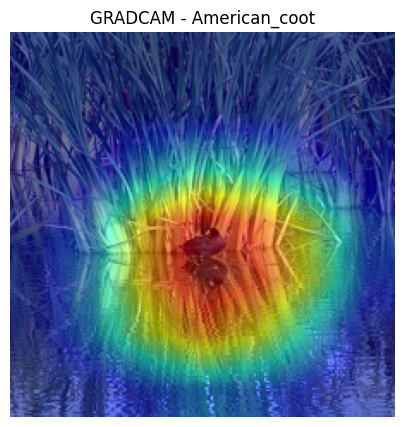

 → SCORECAM


100%|██████████| 128/128 [03:19<00:00,  1.56s/it]


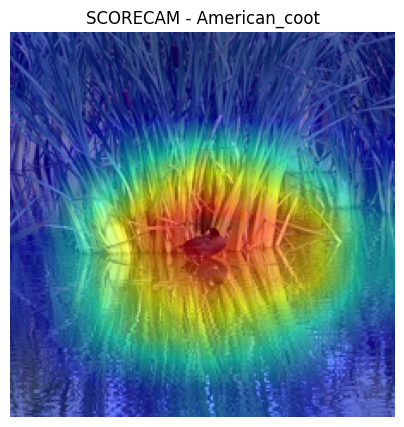

 → ABLATIONCAM


100%|██████████| 64/64 [06:19<00:00,  5.93s/it]


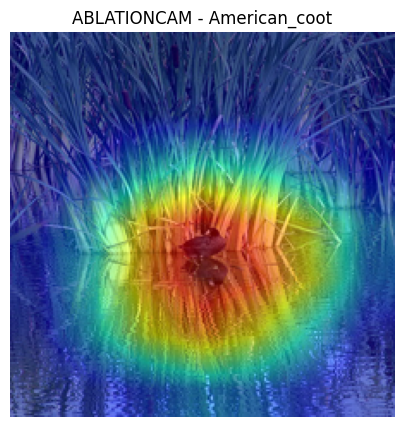

Processing: racer
 → GRADCAM


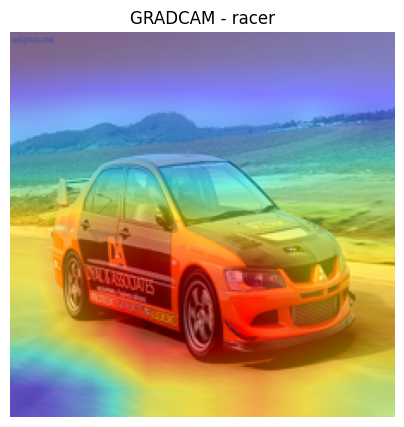

 → SCORECAM


100%|██████████| 128/128 [03:46<00:00,  1.77s/it]


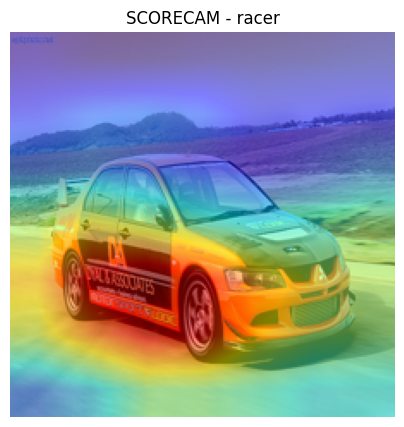

 → ABLATIONCAM


100%|██████████| 64/64 [05:46<00:00,  5.42s/it]


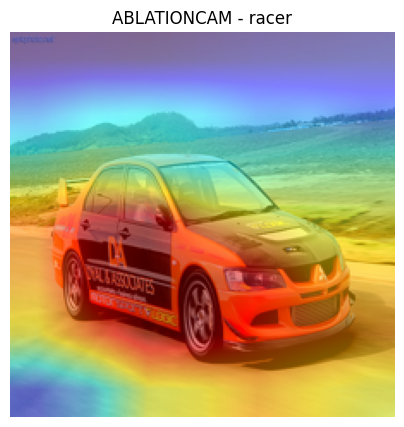

Processing: flamingo
 → GRADCAM


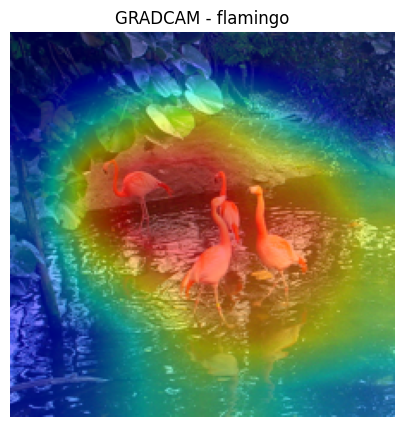

 → SCORECAM


100%|██████████| 128/128 [03:42<00:00,  1.74s/it]


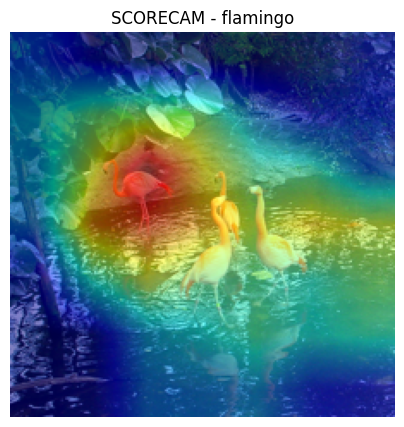

 → ABLATIONCAM


100%|██████████| 64/64 [05:44<00:00,  5.39s/it]


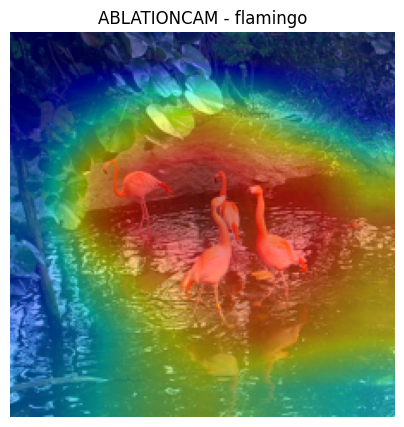

Processing: kite
 → GRADCAM


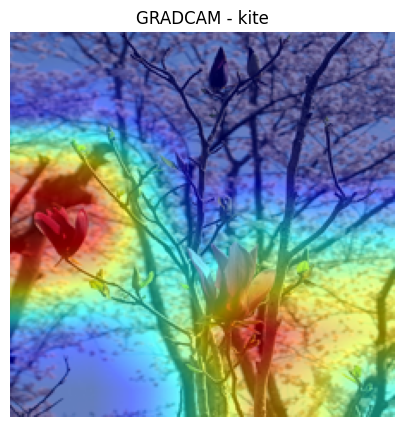

 → SCORECAM


100%|██████████| 128/128 [03:39<00:00,  1.71s/it]


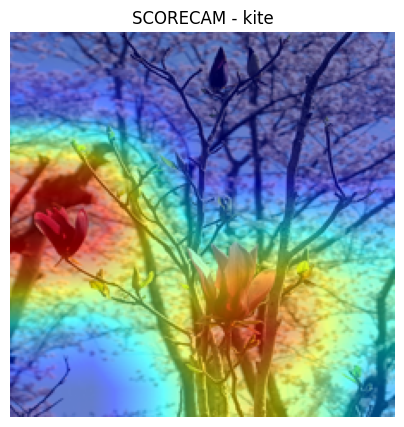

 → ABLATIONCAM


100%|██████████| 64/64 [06:16<00:00,  5.88s/it]


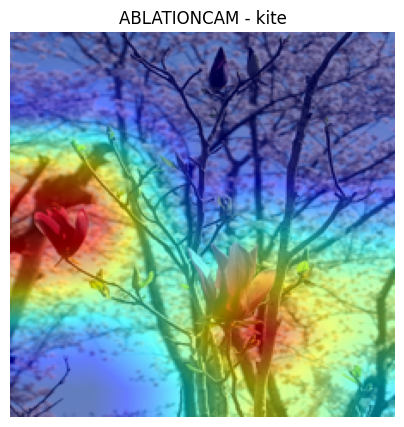

Processing: goldfish
 → GRADCAM


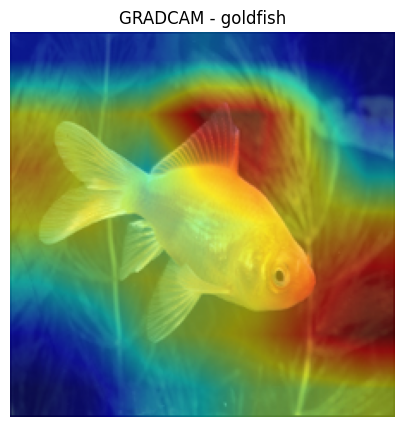

 → SCORECAM


100%|██████████| 128/128 [03:42<00:00,  1.74s/it]


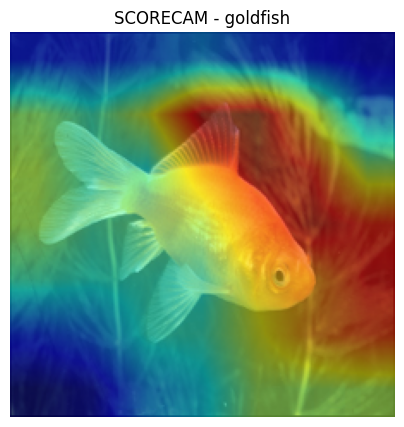

 → ABLATIONCAM


100%|██████████| 64/64 [06:10<00:00,  5.79s/it]


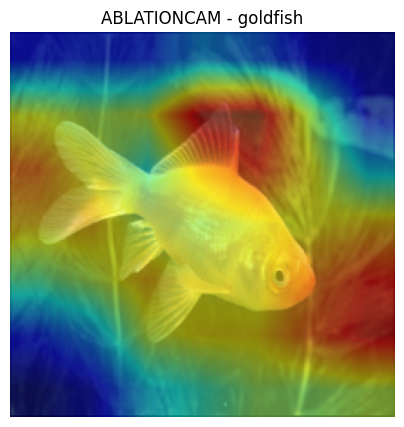

Processing: tiger_shark
 → GRADCAM


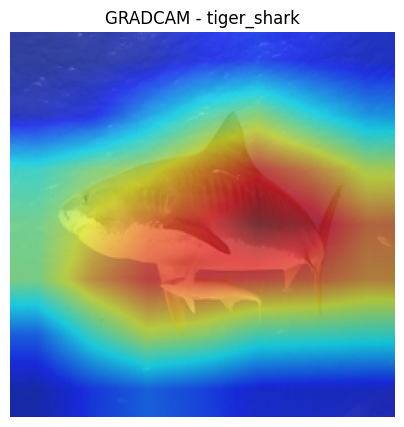

 → SCORECAM


100%|██████████| 128/128 [03:55<00:00,  1.84s/it]


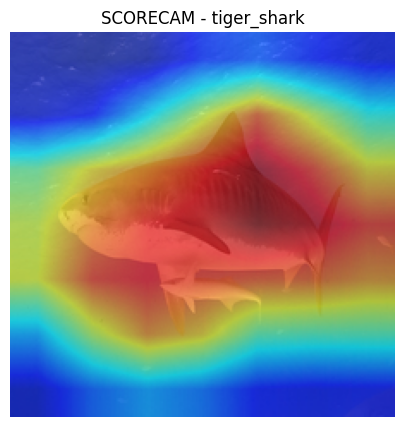

 → ABLATIONCAM


100%|██████████| 64/64 [06:13<00:00,  5.84s/it]


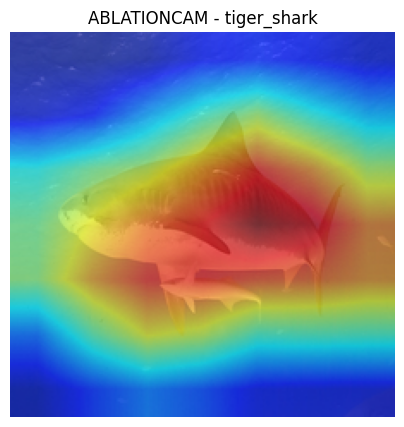

Processing: vulture
 → GRADCAM


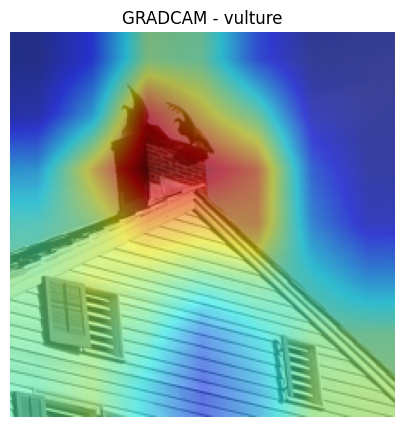

 → SCORECAM


100%|██████████| 128/128 [03:45<00:00,  1.76s/it]


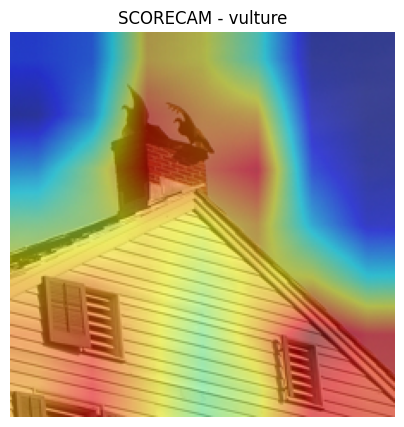

 → ABLATIONCAM


100%|██████████| 64/64 [06:04<00:00,  5.70s/it]


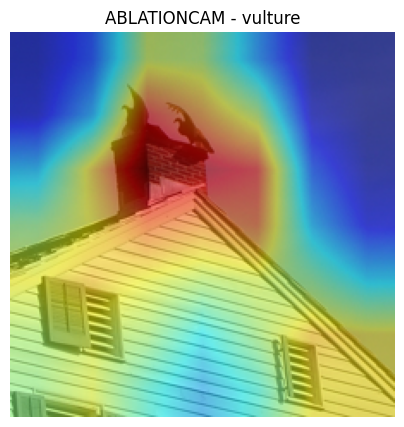

Processing: common_iguana
 → GRADCAM


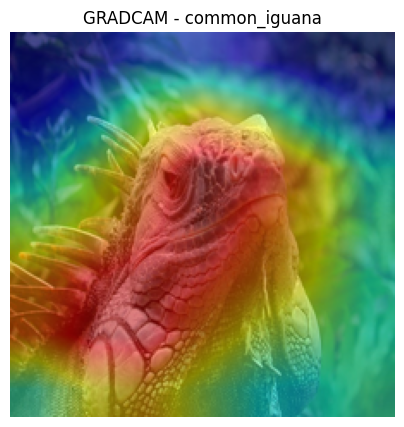

 → SCORECAM


100%|██████████| 128/128 [03:41<00:00,  1.73s/it]


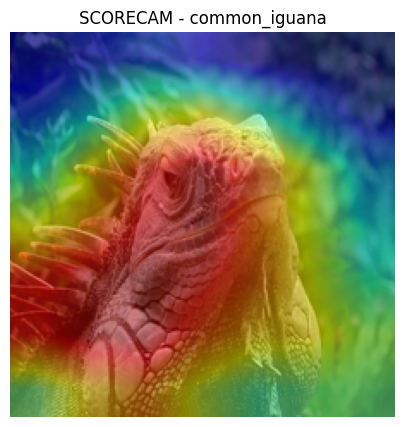

 → ABLATIONCAM


100%|██████████| 64/64 [06:08<00:00,  5.75s/it]


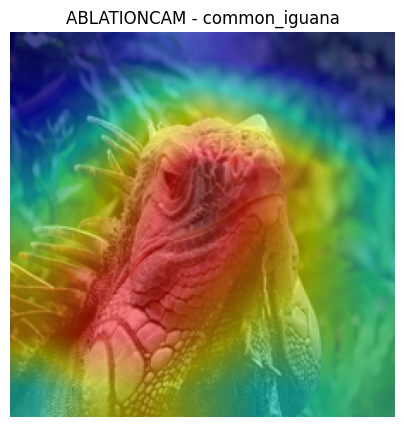

Processing: orange
 → GRADCAM


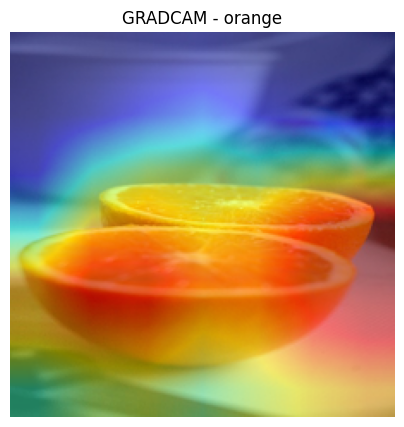

 → SCORECAM


100%|██████████| 128/128 [03:43<00:00,  1.75s/it]


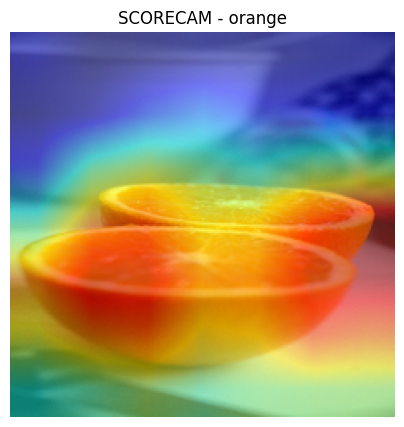

 → ABLATIONCAM


100%|██████████| 64/64 [04:56<00:00,  4.64s/it]


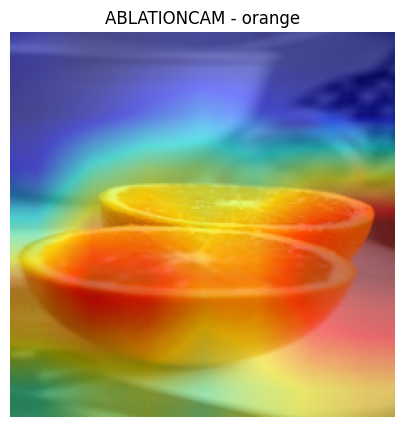

In [29]:
image_urls = {
    "West_Highland_white_terrier": "https://github.com/EliSchwartz/imagenet-sample-images/raw/master/n02098286_West_Highland_white_terrier.JPEG",
    "American_coot": "https://github.com/EliSchwartz/imagenet-sample-images/raw/master/n02018207_American_coot.JPEG",
    "racer": "https://github.com/EliSchwartz/imagenet-sample-images/raw/master/n04037443_racer.JPEG",
    "flamingo": "https://github.com/EliSchwartz/imagenet-sample-images/raw/master/n02007558_flamingo.JPEG",
    "kite": "https://github.com/EliSchwartz/imagenet-sample-images/raw/master/n01608432_kite.JPEG",
    "goldfish": "https://github.com/EliSchwartz/imagenet-sample-images/raw/master/n01443537_goldfish.JPEG",
    "tiger_shark": "https://github.com/EliSchwartz/imagenet-sample-images/raw/master/n01491361_tiger_shark.JPEG",
    "vulture": "https://github.com/EliSchwartz/imagenet-sample-images/raw/master/n01616318_vulture.JPEG",
    "common_iguana": "https://github.com/EliSchwartz/imagenet-sample-images/raw/master/n01677366_common_iguana.JPEG",
    "orange": "https://github.com/EliSchwartz/imagenet-sample-images/raw/master/n07747607_orange.JPEG"
}
#output folders for heatmaps
methods = {
    "gradcam": GradCAM,
    "scorecam": ScoreCAM,
    "ablationcam": AblationCAM
}


# Create folders
for method in methods:
    os.makedirs(f"heatmaps/{method}", exist_ok=True)


# Loop through all images
for name, url in image_urls.items():
    print(f"Processing: {name}")

    # Download and open image
    response = requests.get(url)
    img = Image.open(BytesIO(response.content)).convert("RGB")
    img_tensor = preprocess(img).unsqueeze(0)

    # Prepare numpy version for overlay
    img_np = np.array(img.resize((224, 224))) / 255.0

    for method_name, cam_class in methods.items():
        print(f" → {method_name.upper()}")

        cam = cam_class(model=model, target_layers=[target_layer])
        grayscale_cam = cam(input_tensor=img_tensor)[0]
        cam_image = show_cam_on_image(img_np, grayscale_cam, use_rgb=True)

        # Save heatmap
        save_path = f"heatmaps/{method_name}/{name}.png"
        plt.imsave(save_path, cam_image)

        # Show heatmap
        plt.figure(figsize=(5, 5))
        plt.imshow(cam_image)
        plt.axis("off")
        plt.title(f"{method_name.upper()} - {name}")
        plt.show()

In [31]:
!zip -r /content/heatmaps.zip /content/drive/.Encrypted/MyDrive/TML/

  adding: content/drive/.Encrypted/MyDrive/TML/ (stored 0%)
